In [1]:
from typing import TypedDict, List
import random as r
from langgraph.graph import StateGraph, START, END

In [2]:
class AgentState(TypedDict):
    player_name:str
    guesses:List[int]
    attempts:int
    lower_bound:int
    upper_bound:int
    target:int

In [27]:
def setup(state:AgentState) -> AgentState:
    state['attempts']=0
    state['guesses']=[]
    state['lower_bound']=1
    state['upper_bound']=20
    print(f"Your name is {state['player_name']} and please start the game!")
    return state

def guess(state:AgentState) -> AgentState:
    state['guesses'].append(r.randint(state['lower_bound'], state['upper_bound']))
    state['attempts']+=1
    return state

def hint(state:AgentState) -> AgentState:
    if state['guesses'][-1]>state['target']:
        print(f"higher, {state['attempts']} attempts so far")
        state['upper_bound']-=1
    elif state['guesses'][-1]<state['target']:
        print(f"lower, {state['attempts']} attempts so far")
        state['lower_bound']+=1
    else:
        print("target found")

    return state

def should_continue(state:AgentState) -> str:
    latest_guess=state['guesses'][-1]
    if (state['target']==latest_guess) :
        print(f"Correct Guess {state['target']}")
        return "end"
    elif (state['attempts']>=7) :
        return "end"
    else:
        return "continue_edge"
        
        



In [28]:
graph=StateGraph(AgentState)
graph.add_node("setup", setup)
graph.add_node("guessing", guess)
graph.add_node("hint_code", hint)

graph.add_edge(START, "setup")
graph.add_edge("setup", "guessing")
graph.add_edge("guessing", "hint_code")

graph.set_entry_point("setup")

graph.add_conditional_edges("hint_code", should_continue, {
    "end":END, "continue_edge":"guessing"
})

app=graph.compile()

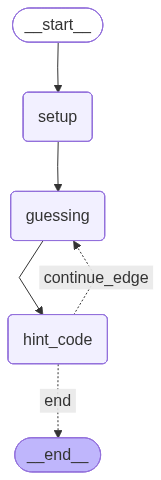

In [29]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [31]:
app.invoke({"player_name":"Inder", "attempts":0, "lower_bound":1, "upper_bound":20, "target":6})

Your name is Inder and please start the game!
lower, 1 attempts so far
higher, 2 attempts so far
target found
Correct Guess 6


{'player_name': 'Inder',
 'guesses': [2, 10, 6],
 'attempts': 3,
 'lower_bound': 2,
 'upper_bound': 19,
 'target': 6}